In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import hyperopt
import sys
sys.path.append('../spock/')
try:
    plt.style.use('paper')
except:
    pass
%matplotlib inline

In [2]:
#load datapath for clean training data that is generated
datapath = '../../cleanData/csvs/resonant/'

#dataset = pd.read_csv(datapath+'25-3-25-fillFac.csv')
dataset = pd.read_csv(datapath+'4-8-25-thetaSTD.csv')
# do 4-4

#remove junk columns
dataset = dataset.drop(columns=['Unnamed: 0','Unnamed: 0.1'])

In [3]:
dataset

,EMcrossnear,EMfracstdnear,EPstdnear,MMRstrengthnear,2BRfillnear,thetaSTDnear,thetanear,thetaVecAngnear,thetaVecMagnear,EMcrossfar,...,thetaVecMagfar,3BRfill,MEGNO,MEGNOstd,Tsec,InitialStable,runstring,instability_time,shadow_instability_time,Stable
0,0.060234,0.029447,0.001995,0.498040,8.652930,1.226847,4.256979,-3.105557,0.727879,0.504063,...,0.002271,1.917395,1.998619,0.003190,28431.355594,1.0,0000000.bin,1.545872e+06,3.063700e+06,False
1,0.080547,0.016559,0.000112,0.452015,25.825316,1.714110,3.580048,-2.992440,0.271597,0.240504,...,0.036891,0.407998,2.001688,0.004966,3904.311701,1.0,0000001.bin,9.990000e+08,9.990000e+08,True
2,0.129660,0.028844,0.003181,1.001973,1.051448,0.105776,4.712411,-3.141573,0.994417,1.001981,...,0.003748,0.418203,1.995051,0.003312,70073.695993,1.0,0000002.bin,9.990000e+08,9.990000e+08,True
3,0.406112,0.036478,0.002390,0.321071,0.040700,1.712152,3.539234,2.834981,0.107787,0.427768,...,0.067468,0.122730,2.002493,0.000335,18313.684674,1.0,0000003.bin,2.287671e+06,8.392234e+06,False
4,0.059897,0.028009,0.001623,0.341814,3.462553,0.850485,4.533666,-3.131504,0.916921,0.257596,...,0.088025,2.369149,2.029737,0.013224,4110.203941,1.0,0000004.bin,9.668931e+05,3.380350e+05,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102492,0.089252,NaN,NaN,NaN,NaN,NaN,NaN,-0.213933,0.148677,0.310694,...,0.392228,NaN,NaN,NaN,23579.372334,0.0,9044761.bin,6.303165e+04,6.470086e+04,False
102493,0.082222,0.039388,0.006138,0.680735,3.218405,0.240267,4.740318,-3.120336,0.973166,0.664222,...,0.026643,3.802285,1.999428,0.004978,4127.353879,1.0,9045377.bin,6.990387e+05,8.267916e+05,False
102494,0.131799,0.022057,0.000146,0.840640,2.216943,0.130695,4.700322,3.129789,0.991491,0.366664,...,0.173336,0.543637,2.079857,0.076478,1130.303709,1.0,9045380.bin,1.193822e+07,3.363291e+07,False
102495,0.209454,0.036889,0.005252,1.497917,7.956804,0.479853,4.690428,3.118570,0.888376,0.395073,...,0.059971,0.118894,1.875273,0.066749,4234.297102,1.0,9045382.bin,2.064407e+08,4.316851e+07,False


In [4]:
import matplotlib as mpl

In [5]:
data = dataset

In [6]:
data.describe()

,EMcrossnear,EMfracstdnear,EPstdnear,MMRstrengthnear,2BRfillnear,thetaSTDnear,thetanear,thetaVecAngnear,thetaVecMagnear,EMcrossfar,...,thetafar,thetaVecAngfar,thetaVecMagfar,3BRfill,MEGNO,MEGNOstd,Tsec,InitialStable,instability_time,shadow_instability_time
count,102497.000000,95951.000000,95951.000000,94867.000000,9.520900e+04,95951.000000,95951.000000,102497.000000,102497.000000,102497.000000,...,95951.000000,102497.000000,102497.000000,9.595100e+04,95951.000000,95951.000000,102497.000000,102497.000000,1.024970e+05,1.024970e+05
mean,0.144542,0.076233,0.004712,0.654740,-1.060116e+03,1.247307,3.819354,-0.095081,0.445665,0.358875,...,3.277085,-0.042426,0.169438,3.408449e+03,27.440420,6.799008,19735.493103,0.936135,2.602292e+08,2.679298e+08
std,0.103741,0.100980,0.009005,1.716331,3.284007e+05,0.670841,0.767614,2.512122,0.363658,0.200712,...,0.524264,1.942527,0.237645,1.024100e+06,76.894153,20.049037,22710.122815,0.244514,4.221284e+08,4.285158e+08
min,0.012845,0.000715,0.000002,0.000266,-1.013297e+08,0.011036,0.865023,-3.141591,0.000060,0.020136,...,0.087824,-3.141592,0.000006,2.353566e-03,-314.442737,0.000001,608.030128,0.000000,1.000287e+04,0.000000e+00
25%,0.072808,0.024225,0.000362,0.059421,3.509326e-01,0.519520,3.121693,-2.978648,0.111542,0.199495,...,3.034332,-1.656222,0.022641,1.327911e-01,1.998406,0.009299,5306.966101,1.000000,8.373884e+04,7.563998e+04
50%,0.117834,0.044674,0.001315,0.155531,1.146290e+00,1.605994,3.794375,-0.071219,0.317168,0.315298,...,3.148905,-0.023679,0.075570,3.663249e-01,2.377402,0.199432,11471.208706,1.000000,1.390492e+06,1.410175e+06
75%,0.182629,0.087319,0.004939,0.564356,3.696746e+00,1.799514,4.695638,2.913634,0.863923,0.484311,...,3.332621,1.520030,0.195212,9.527618e-01,16.863936,4.072095,25319.523778,1.000000,4.969742e+08,7.897363e+08
max,0.982453,7.790978,0.188420,64.907315,4.139040e+05,2.871950,5.723723,3.141593,0.999939,1.194679,...,5.792665,3.141585,0.999901,3.170840e+08,2397.757540,668.779693,241280.324228,1.000000,1.000000e+09,1.000000e+09


In [7]:
data.columns

Index(['EMcrossnear', 'EMfracstdnear', 'EPstdnear', 'MMRstrengthnear',
       '2BRfillnear', 'thetaSTDnear', 'thetanear', 'thetaVecAngnear',
       'thetaVecMagnear', 'EMcrossfar', 'EMfracstdfar', 'EPstdfar',
       'MMRstrengthfar', '2BRfillfar', 'thetaSTDfar', 'thetafar',
       'thetaVecAngfar', 'thetaVecMagfar', '3BRfill', 'MEGNO', 'MEGNOstd',
       'Tsec', 'InitialStable', 'runstring', 'instability_time',
       'shadow_instability_time', 'Stable'],
      dtype='object')

In [8]:
data[['thetaSTDnear','thetaSTDfar']].describe()

,thetaSTDnear,thetaSTDfar
count,95951.000000,95951.000000
mean,1.247307,1.680330
std,0.670841,0.381402
min,0.011036,0.014065
25%,0.519520,1.722747
50%,1.605994,1.803871
75%,1.799514,1.826214
max,2.871950,3.013567


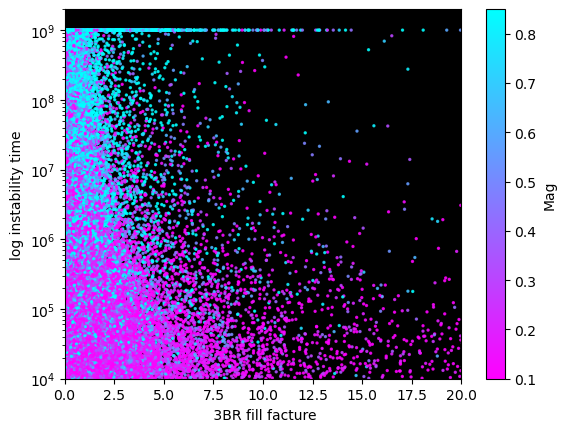

In [9]:
fig, ax = plt.subplots()
vmi = 0.1
vma = 0.85
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmi, vma), cmap='cool_r'),
             ax=ax, orientation='vertical', label='Mag')
ax.scatter((data['3BRfill']),(data['instability_time']), 
           s=2, c=((data['thetaVecMagnear'])), cmap="cool_r",
           vmin=vmi,vmax=vma,alpha=.8)

ax.set_ylim([1e4,2e9])
ax.set_xlim([0,20])

ax.set_xlabel(" 3BR fill facture")
ax.set_ylabel("log instability time")
ax.set_yscale('log')
#cbar.set_label('close body conjunction angle std')
ax.set_facecolor("black")


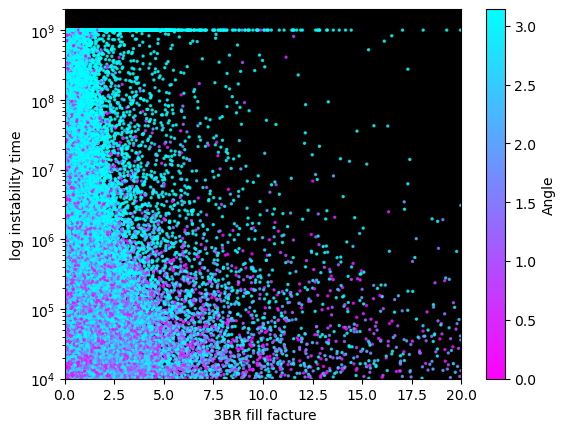

In [10]:
fig, ax = plt.subplots()
vmi = 0
vma = np.pi
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmi, vma), cmap='cool_r'),
             ax=ax, orientation='vertical', label='Angle')
ax.scatter((data['3BRfill']),(data['instability_time']), 
           s=2, c=(np.abs(data['thetaVecAngnear'])), cmap="cool_r",
           vmin=vmi,vmax=vma,alpha=.8)

ax.set_ylim([1e4,2e9])
ax.set_xlim([0,20])

ax.set_xlabel(" 3BR fill facture")
ax.set_ylabel("log instability time")
ax.set_yscale('log')
#cbar.set_label('close body conjunction angle std')
ax.set_facecolor("black")

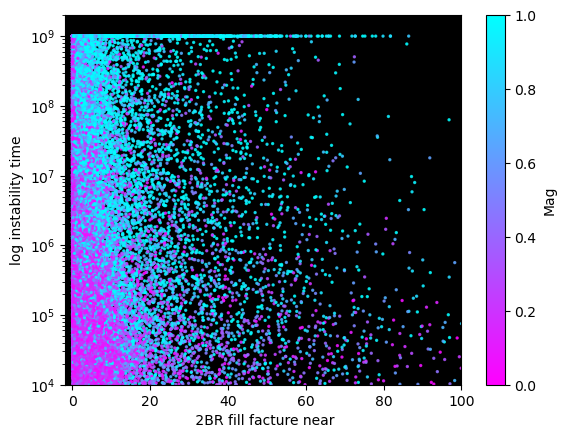

In [14]:
fig, ax = plt.subplots()
vmi = 0
vma = 1
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmi, vma), cmap='cool_r'),
             ax=ax, orientation='vertical', label='Mag')
ax.scatter((data['2BRfillnear']),(data['instability_time']), 
           s=2, c=((data['thetaVecMagnear'])), cmap="cool_r",
           vmin=vmi,vmax=vma,alpha=.8)

ax.set_ylim([1e4,2e9])
ax.set_xlim([-2,100])

ax.set_xlabel(" 2BR fill facture near")
ax.set_ylabel("log instability time")
ax.set_yscale('log')
#cbar.set_label('close body conjunction angle std')
ax.set_facecolor("black")

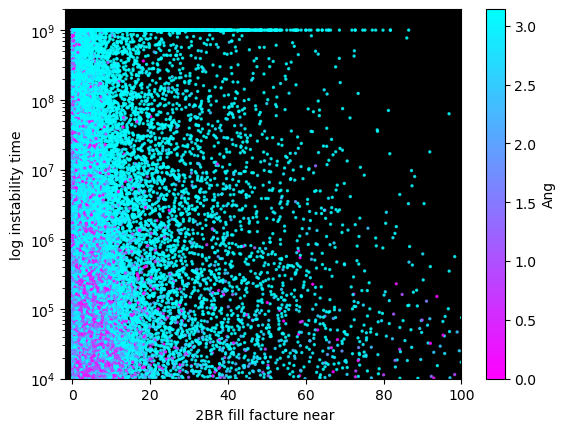

In [12]:
fig, ax = plt.subplots()
vmi = 0
vma = np.pi
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmi, vma), cmap='cool_r'),
             ax=ax, orientation='vertical', label='Ang')
ax.scatter((data['2BRfillnear']),(data['instability_time']), 
           s=2, c=(np.abs(data['thetaVecAngnear'])), cmap="cool_r",
           vmin=vmi,vmax=vma,alpha=.8)

ax.set_ylim([1e4,2e9])
ax.set_xlim([-2,100])

ax.set_xlabel(" 2BR fill facture near")
ax.set_ylabel("log instability time")
ax.set_yscale('log')
#cbar.set_label('close body conjunction angle std')
ax.set_facecolor("black")

In [36]:
from mpl_toolkits.mplot3d import Axes3D

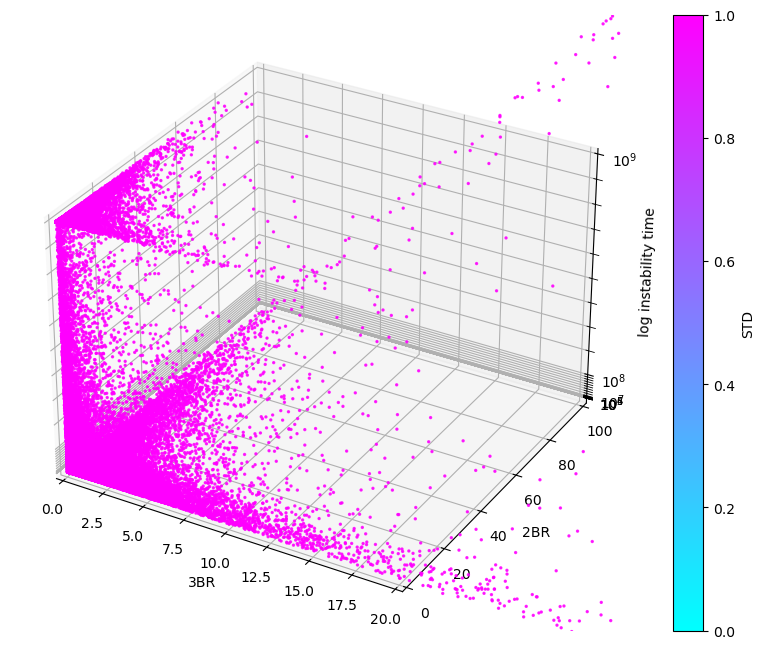

In [32]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')

vmi = 0
vma = 1
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmi, vma), cmap='cool'),
             ax=ax, orientation='vertical', label='STD')
ax.scatter((data['3BRfill']),data['2BRfillnear'],data['instability_time'],
           s=2, c=((data['thetaSTDnear'])), cmap="cool",
           vmin=vmi,vmax=vma,alpha=.8)

ax.set_zlim([1e4,1e9])
ax.set_xlim([0,20])
ax.set_ylim([0,100])

ax.set_xlabel("3BR")
ax.set_ylabel('2BR')
ax.set_zlabel("log instability time")
ax.set_zscale('log')
# #cbar.set_label('close body conjunction angle std')
# ax.set_facecolor("black")


In [30]:
data.columns

Index(['EMcrossnear', 'EMfracstdnear', 'EPstdnear', 'MMRstrengthnear',
       '2BRfillnear', 'thetaSTDnear', 'thetanear', 'thetaVecAngnear',
       'thetaVecMagnear', 'EMcrossfar', 'EMfracstdfar', 'EPstdfar',
       'MMRstrengthfar', '2BRfillfar', 'thetaSTDfar', 'thetafar',
       'thetaVecAngfar', 'thetaVecMagfar', '3BRfill', 'MEGNO', 'MEGNOstd',
       'Tsec', 'InitialStable', 'runstring', 'instability_time',
       'shadow_instability_time', 'Stable'],
      dtype='object')

Text(0.5, 0, '3BRfill')

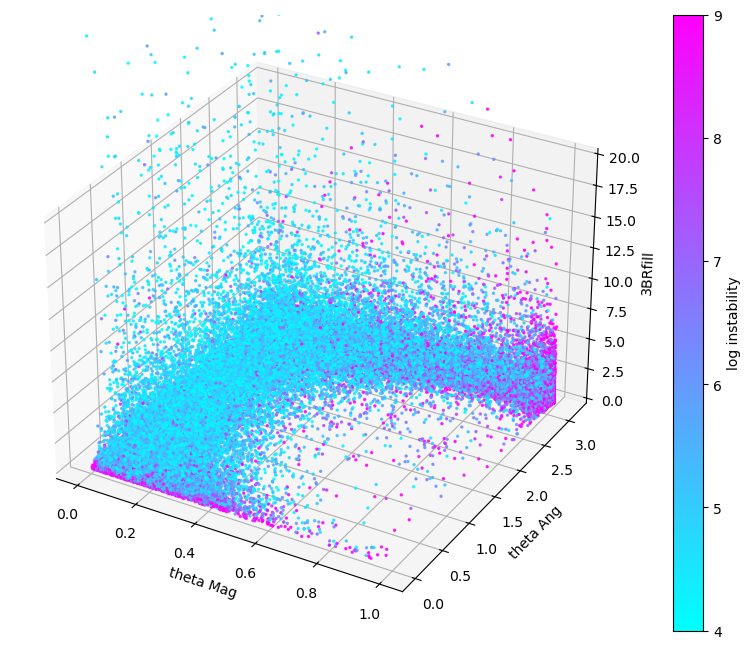

In [18]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')

vmi = 4
vma = 9
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmi, vma), cmap='cool'),
             ax=ax, orientation='vertical', label='log instability')
ax.scatter((data['thetaVecMagnear']),np.abs(data['thetaVecAngnear']),data['3BRfill'],
           s=2, c=np.log10(data['instability_time']), cmap="cool",
           vmin=vmi,vmax=vma,alpha=.8)

# ax.set_xlim([0,20])
# ax.set_ylim([0,100])
ax.set_zlim([0,20])


ax.set_xlabel("theta Mag")
ax.set_ylabel('theta Ang')
ax.set_zlabel("3BRfill")

In [44]:
data

,EMcrossnear,EMfracstdnear,EPstdnear,MMRstrengthnear,2BRfillnear,thetaSTDnear,thetanear,thetaVecAngnear,thetaVecMagnear,EMcrossfar,...,thetaVecMagfar,3BRfill,MEGNO,MEGNOstd,Tsec,InitialStable,runstring,instability_time,shadow_instability_time,Stable
0,0.060234,0.029447,0.001995,0.498040,8.652930,4.256979,NaN,-3.105557,0.727879,0.504063,...,0.002271,1.917395,1.998619,0.003190,28431.355594,1.0,0000000.bin,1.545872e+06,3.063700e+06,False
1,0.080547,0.016559,0.000112,0.452015,25.825316,3.580048,NaN,-2.992440,0.271597,0.240504,...,0.036891,0.407998,2.001688,0.004966,3904.311701,1.0,0000001.bin,9.990000e+08,9.990000e+08,True
2,0.129660,0.028844,0.003181,1.001973,1.051448,4.712411,NaN,-3.141573,0.994417,1.001981,...,0.003748,0.418203,1.995051,0.003312,70073.695993,1.0,0000002.bin,9.990000e+08,9.990000e+08,True
3,0.406112,0.036478,0.002390,0.321071,0.040700,3.539234,NaN,2.834981,0.107787,0.427768,...,0.067468,0.122730,2.002493,0.000335,18313.684674,1.0,0000003.bin,2.287671e+06,8.392234e+06,False
4,0.059897,0.028009,0.001623,0.341814,3.462553,4.533666,NaN,-3.131504,0.916921,0.257596,...,0.088025,2.369149,2.029737,0.013224,4110.203941,1.0,0000004.bin,9.668931e+05,3.380350e+05,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102492,0.089252,NaN,NaN,NaN,NaN,NaN,NaN,-0.213933,0.148677,0.310694,...,0.392228,NaN,NaN,NaN,23579.372334,0.0,9044761.bin,6.303165e+04,6.470086e+04,False
102493,0.082222,0.039388,0.006138,0.680735,3.218405,4.740318,NaN,-3.120336,0.973166,0.664222,...,0.026643,3.802285,1.999428,0.004978,4127.353879,1.0,9045377.bin,6.990387e+05,8.267916e+05,False
102494,0.131799,0.022057,0.000146,0.840640,2.216943,4.700322,NaN,3.129789,0.991491,0.366664,...,0.173336,0.543637,2.079857,0.076478,1130.303709,1.0,9045380.bin,1.193822e+07,3.363291e+07,False
102495,0.209454,0.036889,0.005252,1.497917,7.956804,4.690428,NaN,3.118570,0.888376,0.395073,...,0.059971,0.118894,1.875273,0.066749,4234.297102,1.0,9045382.bin,2.064407e+08,4.316851e+07,False


In [62]:
drop = data

In [63]:
drop = drop[drop['3BRfill'] > 1]


In [64]:
drop['Stable'].describe()

count     22977
unique        2
top       False
freq      21182
Name: Stable, dtype: object

In [65]:
drop = drop[drop['thetaVecMagnear'] > 0.95]

In [66]:
drop['Stable'].describe()


count      2499
unique        2
top       False
freq       1602
Name: Stable, dtype: object

In [71]:
drop = drop[drop['2BRfillnear'] > 10]


In [72]:
drop['Stable'].describe()


count       863
unique        2
top       False
freq        616
Name: Stable, dtype: object

In [73]:
drop[drop['Stable']==True].describe()

,EMcrossnear,EMfracstdnear,EPstdnear,MMRstrengthnear,2BRfillnear,thetaSTDnear,thetanear,thetaVecAngnear,thetaVecMagnear,EMcrossfar,...,thetafar,thetaVecAngfar,thetaVecMagfar,3BRfill,MEGNO,MEGNOstd,Tsec,InitialStable,instability_time,shadow_instability_time
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,...,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.0,2.470000e+02,2.470000e+02
mean,0.073820,0.035214,0.001986,1.456511,21.370827,0.177453,4.708889,-0.340489,0.984987,0.488033,...,3.179463,-0.364038,0.094571,2.489266,1.999089,0.010288,12733.864076,1.0,9.999514e+08,9.970168e+08
std,0.026757,0.034828,0.003614,0.760409,11.462557,0.112470,0.042178,3.109713,0.012999,0.224895,...,0.364792,1.829409,0.176703,1.938995,0.125484,0.042115,11827.624289,0.0,2.154312e+05,4.618268e+07
min,0.022186,0.003279,0.000040,0.234096,10.014975,0.025752,4.465059,-3.141557,0.951604,0.070168,...,1.998292,-3.133202,0.000271,1.003475,1.536130,0.000011,968.617128,1.0,9.990000e+08,2.741447e+08
25%,0.050829,0.016423,0.000288,0.958928,13.467584,0.097049,4.694075,-3.133501,0.976980,0.322820,...,3.051843,-1.997506,0.007916,1.301025,1.995823,0.000430,4082.336462,1.0,1.000000e+09,1.000000e+09
50%,0.072908,0.026083,0.000756,1.297943,17.192879,0.147421,4.712059,-3.101833,0.989207,0.467536,...,3.139471,-0.534360,0.028338,1.825212,1.999366,0.001631,8102.646001,1.0,1.000000e+09,1.000000e+09
75%,0.093504,0.040920,0.001995,1.827562,25.121713,0.224204,4.722199,3.129759,0.995320,0.655932,...,3.220078,1.074232,0.085360,2.971613,2.000592,0.006763,17392.451271,1.0,1.000000e+09,1.000000e+09
max,0.130163,0.399717,0.033145,5.867494,66.343966,0.604524,5.037013,3.141528,0.999668,1.039394,...,4.893223,3.140067,0.993116,14.156739,3.795707,0.592400,72019.702802,1.0,1.000000e+09,1.000000e+09


In [26]:
drop = drop[drop['2BRfillfar'] > 1]


In [27]:
drop['Stable'].describe()


count       149
unique        2
top       False
freq        146
Name: Stable, dtype: object

In [46]:
drop = drop[drop['Stable'] == True]
drop = drop[drop['3BRfill'] >1]


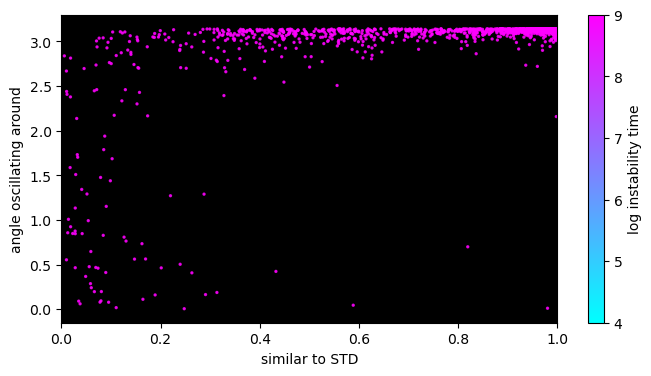

In [57]:
fig, ax = plt.subplots(figsize=(8,4))
vmi = 4
vma = 9
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmi, vma), cmap='cool'),
             ax=ax, orientation='vertical', label='log instability time')
ax.scatter((drop['thetaVecMagnear']),np.abs(drop['thetaVecAngnear']), 
           s=2, c=np.log10(drop['instability_time']), cmap="cool",
           vmin=vmi,vmax=vma,alpha=.8)

# ax.set_ylim([-2,100])
ax.set_xlim([0,1])

ax.set_xlabel("similar to STD")
ax.set_ylabel("angle oscillating around")
#ax.set_yscale('log')
#cbar.set_label('close body conjunction angle std')
ax.set_facecolor("black")